In [2]:
import pandas as pd

# Load the dataset
file_path = '/Users/macbook/Desktop/Research/Explainable AI/Survey/X AI_August 22, 2024_20.09.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,StartDate,EndDate,Status,ResponseId,Q1_1,Q1_2,Q1_3,Q1_4,Q2_1,Q2_2,...,Q10_1,Q11_1,Q12_1,Q13_1,Q14_1,Q15,Q16,Q17,Q18,Q19
0,Start Date,End Date,Response Type,Response ID,Imagine your friend is preparing to apply for ...,Imagine your friend is preparing to apply for ...,Imagine your friend is preparing to apply for ...,Imagine your friend is preparing to apply for ...,Imagine your friend is preparing to apply for ...,Imagine your friend is preparing to apply for ...,...,Is the tool efficient at what it does? - Your ...,What is your confidence in the tool? - Your an...,How difficult was the task? - Your answer:,How successful were you at the task? - Your an...,How mentally demanding was the task? - Your an...,Please state your gender.,How old are you? (e.g. 19),Please state your race/ethnicity. (Select all ...,What is the highest level of education you hav...,What is your total household income?
1,2024-08-22 20:07:00,2024-08-22 20:07:01,Survey Test,R_cScPmeqq2xlVrcG,56,44,0,0,NaN,NaN,...,Might or might not,A moderate amount,Somewhat easy,Somewhat successful,Very high,Prefer not to say,1830926605,"Black, African American,Native Hawaiian or Oth...","Technical, trade or vocational school AFTER hi...","$35,000 to $49,999"
2,2024-08-22 20:07:01,2024-08-22 20:07:01,Survey Test,R_5mMLyjP36UbKRCu,NaN,NaN,NaN,NaN,12,64,...,Definitely not,A little,Somewhat easy,Somewhat successful,Very low,Female,862126795,"American Indian, Alaska Native,Middle Eastern ...","2 year degree (e.g. AA, AS)","$20,000 to $34,999"
3,2024-08-22 20:07:01,2024-08-22 20:07:01,Survey Test,R_enzKzA0hxvfxjym,85,2,0,13,NaN,NaN,...,Might or might not,A little,Extremely easy,Very unsuccessful,Neither low nor high,Male,695640682,"American Indian, Alaska Native,Asian,Black, Af...","2 year degree (e.g. AA, AS)","$75,000 to $99,999"
4,2024-08-22 20:07:02,2024-08-22 20:07:02,Survey Test,R_57kjdn6Py4I1SCy,NaN,NaN,NaN,NaN,26,59,...,Probably yes,A great deal,Extremely easy,Very unsuccessful,Very high,Female,768339932,"Middle Eastern and North African,Native Hawaii...",High school degree or equivalent (e.g. GED),"$20,000 to $34,999"


In [5]:
# Filter rows with non-null values for Q1_1 to Q1_4
df_q1 = df[df[['Q1_1', 'Q1_2', 'Q1_3', 'Q1_4']].notnull().any(axis=1)]

# Filter rows with non-null values for Q2_1 to Q2_4
df_q2 = df[df[['Q2_1', 'Q2_2', 'Q2_3', 'Q2_4']].notnull().any(axis=1)]

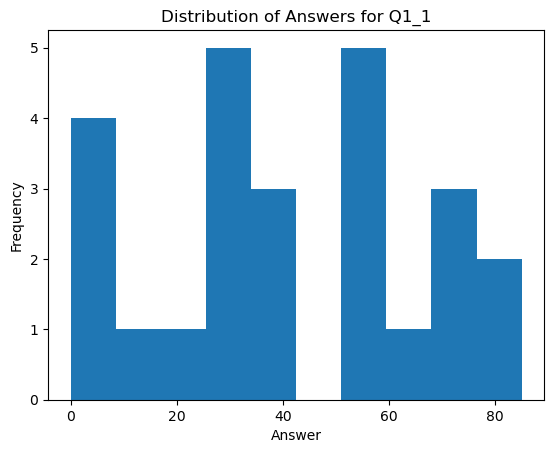

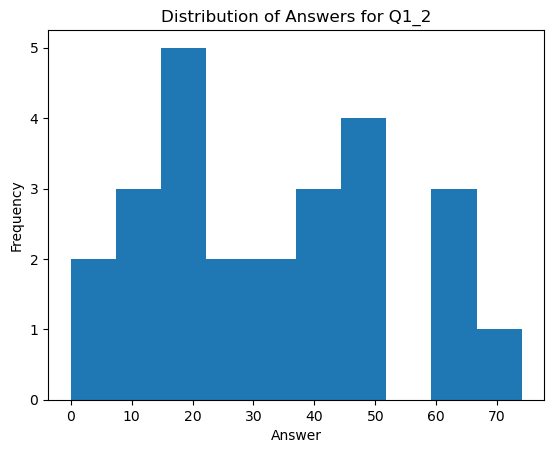

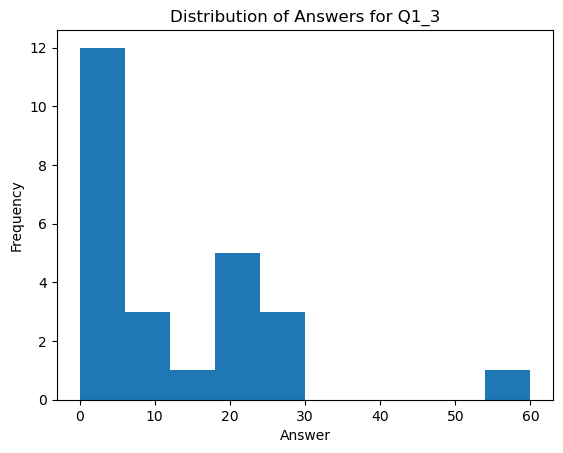

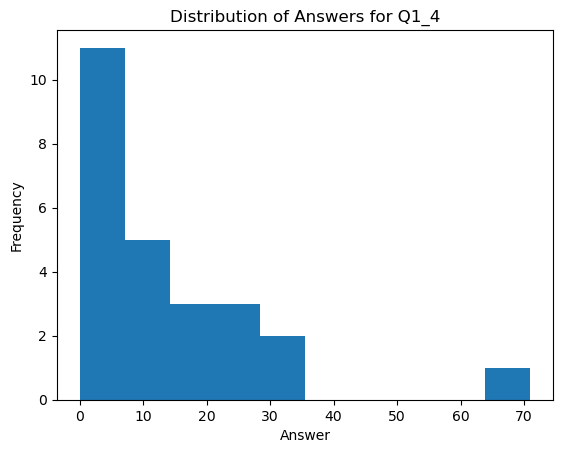

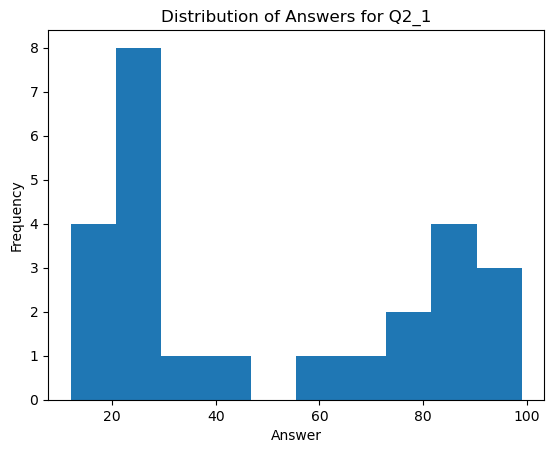

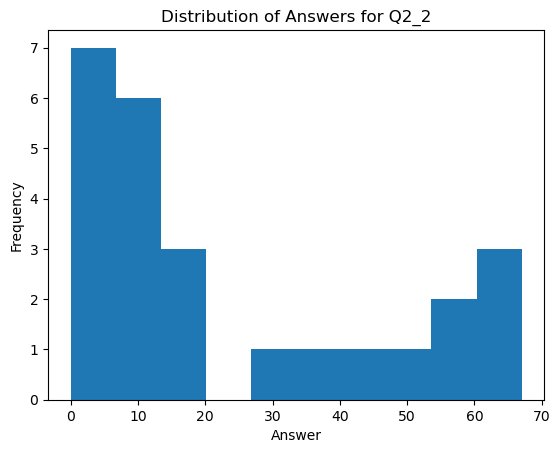

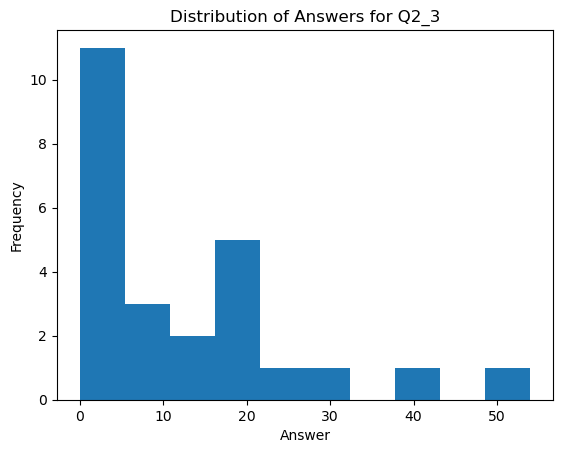

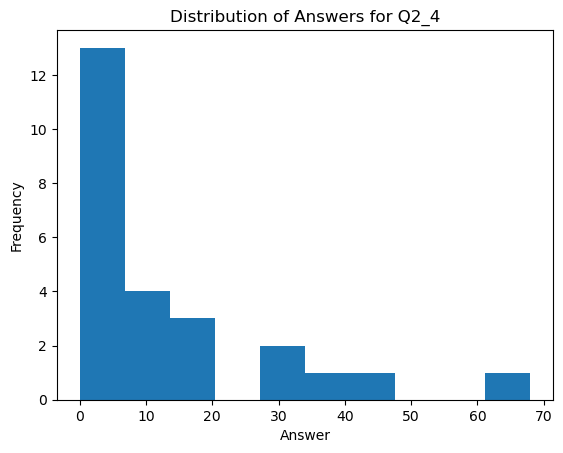

In [10]:
import matplotlib.pyplot as plt

# List of question columns for Q1 and Q2
q1_columns = ['Q1_1', 'Q1_2', 'Q1_3', 'Q1_4']
q2_columns = ['Q2_1', 'Q2_2', 'Q2_3', 'Q2_4']

# Exclude the first row (header row)
df_filtered = df.iloc[1:].copy()

# Convert relevant columns to numeric, coercing errors so that text data is excluded
df_filtered[q1_columns] = df_filtered[q1_columns].apply(pd.to_numeric, errors='coerce')
df_filtered[q2_columns] = df_filtered[q2_columns].apply(pd.to_numeric, errors='coerce')

# Plot distribution for Q1 questions
for col in q1_columns:
    plt.figure()
    df_filtered[col].dropna().plot(kind='hist', bins=10)
    plt.title(f'Distribution of Answers for {col}')
    plt.xlabel('Answer')
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution for Q2 questions
for col in q2_columns:
    plt.figure()
    df_filtered[col].dropna().plot(kind='hist', bins=10)
    plt.title(f'Distribution of Answers for {col}')
    plt.xlabel('Answer')
    plt.ylabel('Frequency')
    plt.show()

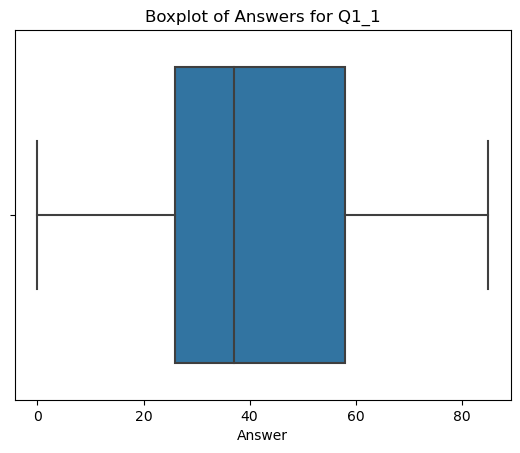

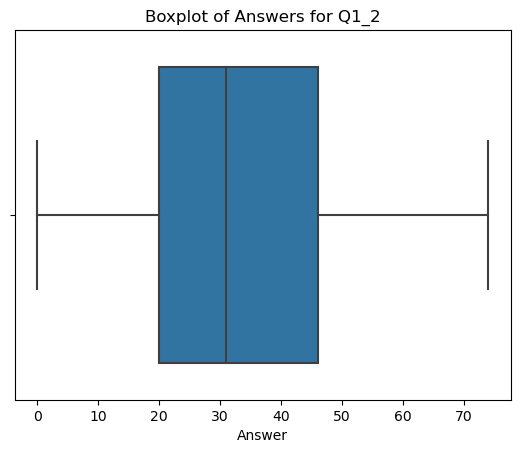

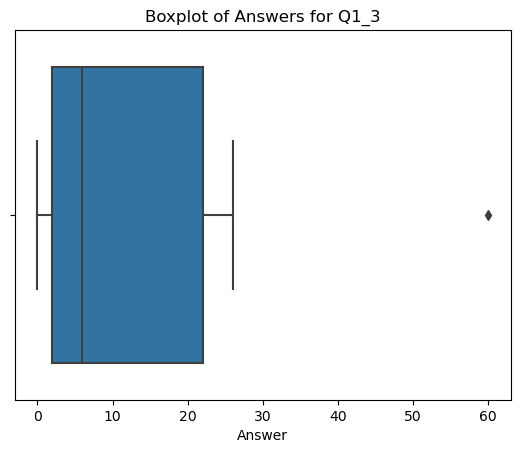

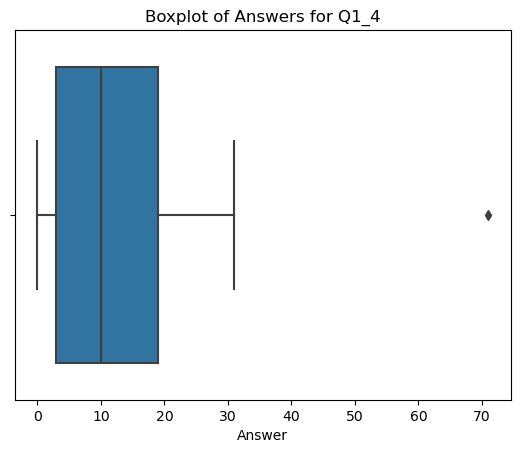

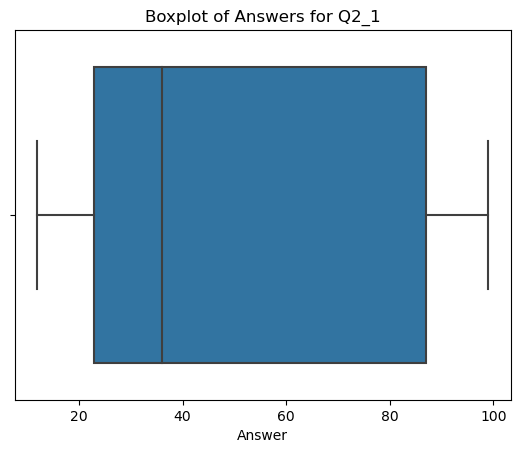

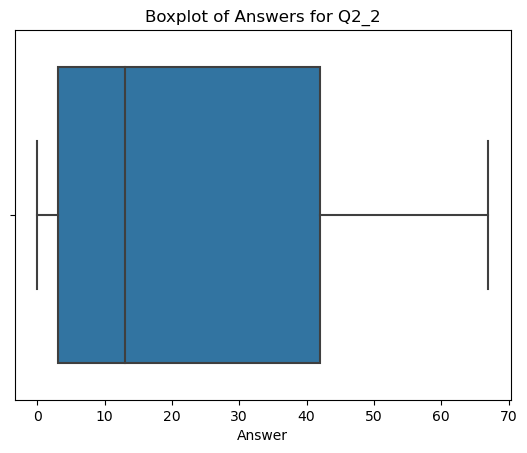

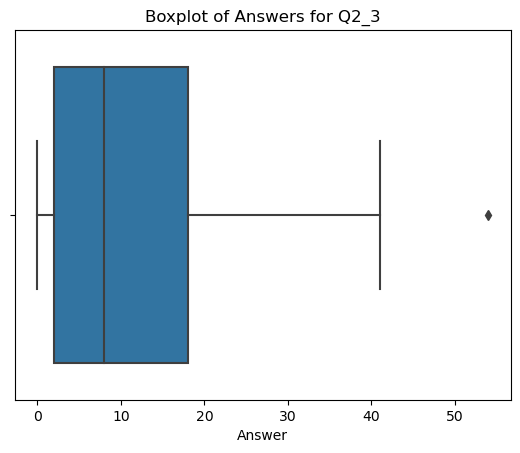

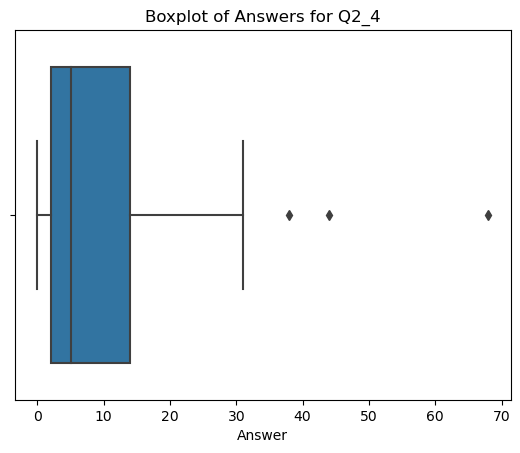

In [9]:
import seaborn as sns

# Plot boxplot for Q1 questions
for col in q1_columns:
    plt.figure()
    sns.boxplot(x=df_filtered[col].dropna())  # Plot only non-null numeric values
    plt.title(f'Boxplot of Answers for {col}')
    plt.xlabel('Answer')
    plt.show()

# Plot boxplot for Q2 questions
for col in q2_columns:
    plt.figure()
    sns.boxplot(x=df_filtered[col].dropna())  # Plot only non-null numeric values
    plt.title(f'Boxplot of Answers for {col}')
    plt.xlabel('Answer')
    plt.show()

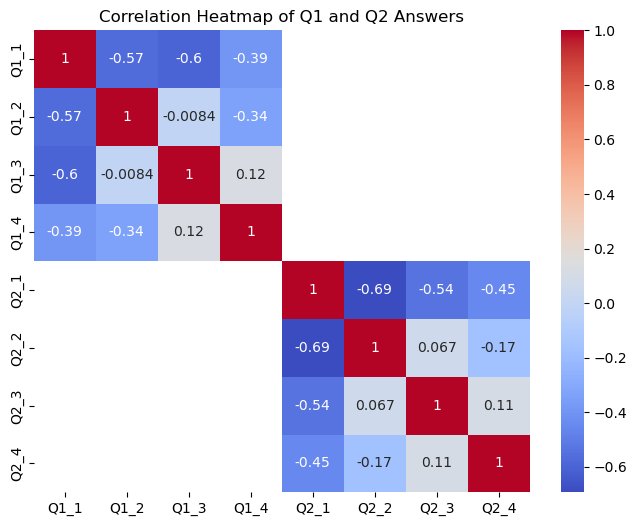

In [11]:
# Correlation heatmap for Q1 and Q2 questions combined
import seaborn as sns
corr = df_filtered[q1_columns + q2_columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Q1 and Q2 Answers')
plt.show()

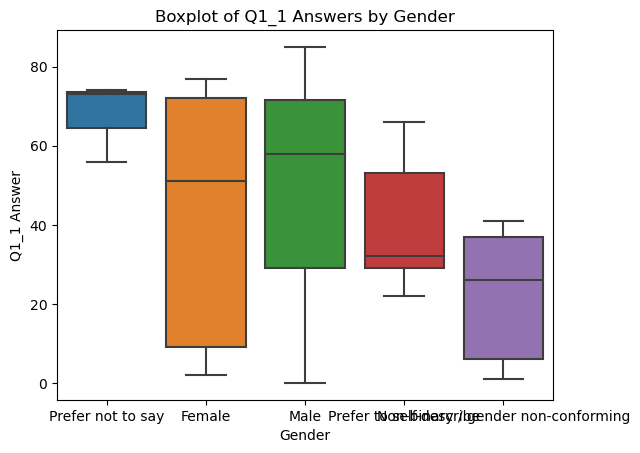

In [13]:
# Boxplot of Q1_1 answers by gender (assuming Q15 is gender)
sns.boxplot(x='Q15', y='Q1_1', data=df_filtered)
plt.title('Boxplot of Q1_1 Answers by Gender')
plt.xlabel('Gender')
plt.ylabel('Q1_1 Answer')
plt.show()

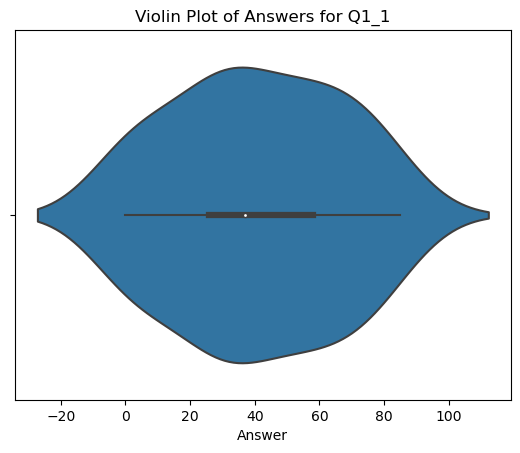

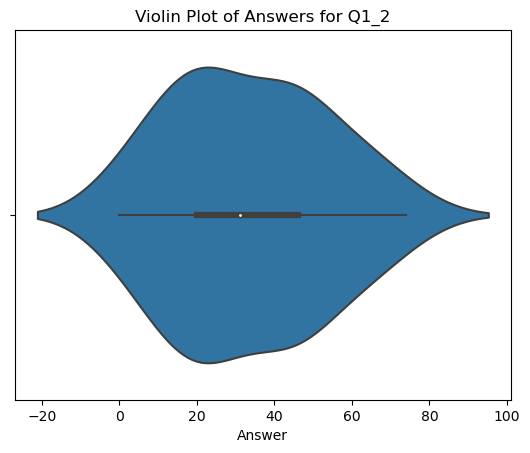

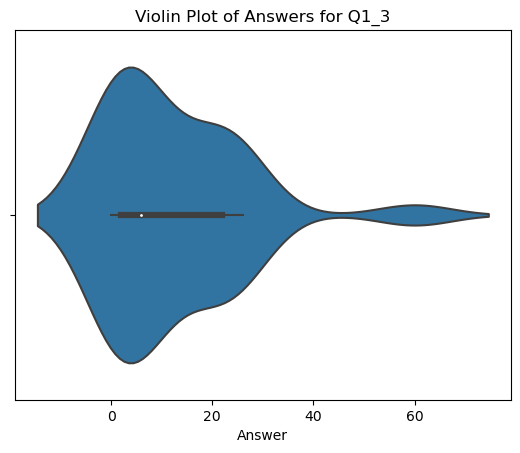

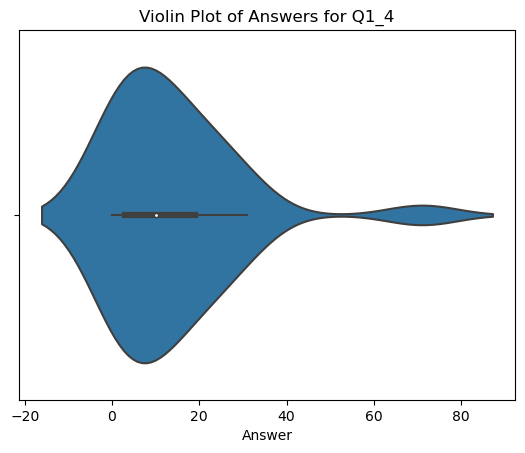

In [14]:
# Violin plot for Q1 questions
for col in q1_columns:
    plt.figure()
    sns.violinplot(x=df_filtered[col].dropna())
    plt.title(f'Violin Plot of Answers for {col}')
    plt.xlabel('Answer')
    plt.show()

In [15]:
from scipy import stats
# Example: Compare Q1_1 answers between male and female respondents
male_answers = df_filtered[df_filtered['Q15'] == 'Male']['Q1_1'].dropna().astype(float)
female_answers = df_filtered[df_filtered['Q15'] == 'Female']['Q1_1'].dropna().astype(float)
t_stat, p_value = stats.ttest_ind(male_answers, female_answers)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 0.19694853945742463, P-value: 0.8503698885341856


In [17]:
# Example: ANOVA test for Q1_1 across education levels (Q18 is education level)
df_filtered['Q18'] = df_filtered['Q18'].astype('category')
groups = [group.dropna().astype(float) for name, group in df_filtered.groupby('Q18')['Q1_1']]
f_stat, p_value = stats.f_oneway(*groups)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 0.7183350972732696, P-value: 0.6400215194453229


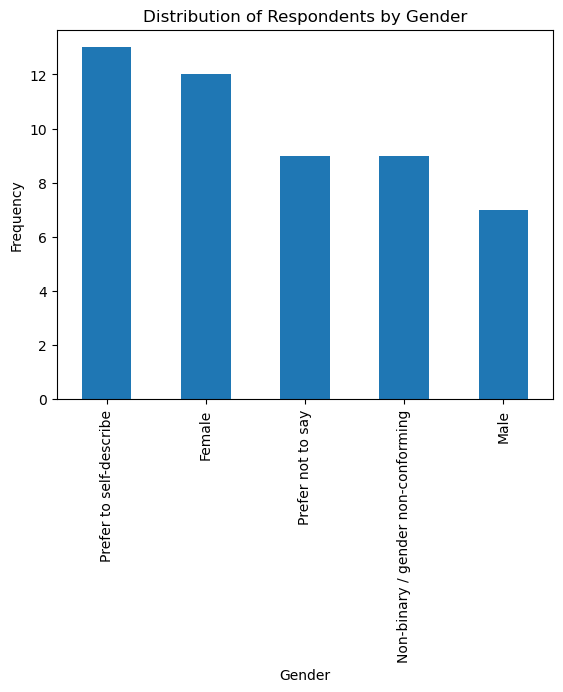

In [18]:
# Bar plot for gender
df_filtered['Q15'].value_counts().plot(kind='bar')
plt.title('Distribution of Respondents by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()